https://www.kaggle.com/ronitf/heart-disease-uci

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [76]:
import pandas as pd

In [77]:
df1 = pd.read_csv('heart.csv')


In [78]:
target = df1['target']
X = df1.drop(['target'], axis = 1)

Estandarizamos

In [79]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, target, train_size=0.7, random_state=42)

In [81]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

**PREGUNTA**

1. Calcula la exactitud (Accuracy) para un modelo árbol de decisión, SVM y Regresión logística

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [83]:
# Modelo de arbol de decision
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_std, y_train)
y_pred_tree = tree_model.predict(X_test_std)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'La excatitud para el modelo de arbol de decisión es: {accuracy_tree}')

La excatitud para el modelo de arbol de decisión es: 0.7362637362637363


In [84]:
# Modelo SVM
svm_model = SVC(random_state= 42)
svm_model.fit(X_train_std, y_train)
y_pred_svm = svm_model.predict(X_test_std)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'La exactitud del modelo SVM es: {accuracy_svm}')

La exactitud del modelo SVM es: 0.8241758241758241


In [85]:
#Modelo de regresion logistica
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_std, y_train)
y_pred_logistic = logistic_model.predict(X_test_std)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'La excatitud del modelo de regresión logistica es: {accuracy_logistic}')

La excatitud del modelo de regresión logistica es: 0.8131868131868132


**PREGUNTA**

2. ¿Cómo de seguro puede estar un paciente al que le hemos predicho problema de corazón? (TP) respecto el total de los que hemos estimado que lo tienen (TP+FP)?

3. ¿Cómo se llama esta métrica?

In [86]:
from sklearn.metrics import precision_score
precision_tree = precision_score(y_test, y_pred_tree)
print(f'Precisión del modelo de arbol de decisión: {precision_tree}')

Precisión del modelo de arbol de decisión: 0.7954545454545454


In [87]:
from sklearn.metrics import precision_score
precision_svm = precision_score(y_test, y_pred_svm)
print(f'Precisión del modelo SVM es: {precision_svm}')

Precisión del modelo SVM es: 0.84


In [88]:
from sklearn.metrics import precision_score
precision_logistic = precision_score(y_test, y_pred_logistic)
print(f'Precisión del modelo de Regresión Logística es: {precision_logistic}')

Precisión del modelo de Regresión Logística es: 0.8235294117647058


La metrica se llama **precisión** y se refiere a la proporción de predicciones positivas correctas (casos positivos correctamente identificados) entre todas las predicciones positivas realizadas por el modelo.

Entonces, para cada modelo:

Para el modelo de Árbol de Decisión, aproximadamente el 79.55% de los pacientes a los que se les predijo un problema cardíaco realmente lo tenían.
Para el modelo SVM, aproximadamente el 84% de los pacientes a los que se les predijo un problema cardíaco realmente lo tenían.
Para el modelo de Regresión Logística, aproximadamente el 82.35% de los pacientes a los que se les predijo un problema cardíaco realmente lo tenían.

Estos valores indican la "seguridad" o precisión en las predicciones positivas de cada modelo.

**PREGUNTA**

4. ¿Cómo de buenas son nuestras predicciones para detectar problemas de corazón? cuántos pacientes hemos estimado que tienen problemas de corazón correctamente (TP) de entre todos los que realmente tienen problema de corazón (TP + FN)? -> **NOS INTERESA**

5. ¿Cómo se llama esta métrica?

In [89]:
from sklearn.metrics import recall_score
recall_tree = recall_score(y_test, y_pred_tree)
print(f'La sensibilidad del modelo de arbol de decision es: {recall_tree}')

La sensibilidad del modelo de arbol de decision es: 0.7


In [90]:
recall_svm = recall_score(y_test, y_pred_svm)
print(f'La sensibilidad del modelo SVM es: {recall_svm}')

La sensibilidad del modelo SVM es: 0.84


In [91]:
recall_logistic = recall_score(y_test, y_pred_logistic)
print(f'La sensibilidad del modelo de regresión logistica es: {recall_logistic}')

La sensibilidad del modelo de regresión logistica es: 0.84


Si los errores causados por los falsos negativos (FN) son más indeseables, se prioriza la sensibilidad (recall). Esto es importante cuando la omisión de un caso positivo tiene consecuencias graves, como en la detección de enfermedades críticas.
La metrica se llama **Sensibilidad** (Recall) y proporciona información sobre la proporción de paciente con problemas cardiacos que el modelo ha identificado correctamente en comparación con el total de pacientes con problemas cardiacos.
Para el modelo de Árbol de Decisión, la sensibilidad es 0.7, lo que significa que el 70% de los pacientes con problemas cardíacos fueron identificados correctamente por el modelo.
Para el modelo SVM y el modelo de Regresión Logística, la sensibilidad es 0.84, lo que significa que el 84% de los pacientes con problemas cardíacos fueron identificados correctamente por estos modelos.
En resumen, la sensibilidad es una medida importante para evaluar la capacidad del modelo para detectar positivos en problemas de clasificación desequilibrados, como el diagnóstico médico.

**PREGUNTA**

6. Calcula el F1-Score de los 3 modelos

In [92]:
from sklearn.metrics import f1_score
f1_tree = f1_score(y_test, y_pred_tree)
print(f'El F1 Score del modelo de arbol de decision es: {f1_tree}')

El F1 Score del modelo de arbol de decision es: 0.7446808510638298


In [93]:
f1_svm = f1_score(y_test, y_pred_svm)
print(f'El F1 Score del modelo SVM es: {f1_svm}')

El F1 Score del modelo SVM es: 0.8399999999999999


In [94]:
f1_logistic = f1_score(y_test, y_pred_logistic)
print(f'El F1 Score del modelo de regresión logistica es: {f1_logistic}')

El F1 Score del modelo de regresión logistica es: 0.8316831683168315


**PREGUNTA**

7. Si lo que nos interesa es acertar bien los que tienen problemas de corazón, aunque detectemos algunos que no lo sean. (De esta manera evitamos que aquellos que si que tienen problemas no los perdamos) ¿Qué métrica debemos analizar?


 Si el enfoque principal es asegurarse de identificar correctamente a todos los pacientes que realmente tienen problemas cardíacos (minimizar los falsos negativos), la métrica clave a analizar sería la sensibilidad (recall). Esta metrica se centra en la proporción de casos positivos que el modelo logra capturar correctamente en comparación con el total de casos positivos reales. Es decir, mide cuantos de los pacientes con problemas de corazón se han identificado correctamente.
 En definitiva, maximizar la sensibilidad es especialmente importante en situaciones en las que es crítico no perder a ningún paciente con problemas de corazón, incluso a costa de tener algunos falsos positivos.

**PREGUNTA**

8. ¿Qué algoritmo es mejor independientemente de la métrica y umbral (Área bajo la curva) AUC?

El Área bajo la Curva ROC (AUC-ROC) es una métrica que se utiliza comúnmente para evaluar y comparar modelos de clasificación independientemente del umbral de clasificación. AUC-ROC evalúa el rendimiento del modelo a lo largo de todos los posibles umbrales de clasificación, proporcionando una medida agregada de la capacidad del modelo para discriminar entre clases.

Podemos decir:
AUC-ROC cercano a 1.0: Indica un buen rendimiento del modelo, ya que significa que el modelo tiene una buena tasa de verdaderos positivos y una baja tasa de falsos positivos, independientemente del umbral de clasificación.
AUC-ROC cercano a 0.5: Indica que el modelo tiene un rendimiento similar al azar.

En resumen, un mayor AUC-ROC generalmente sugiere un mejor rendimiento del modelo en términos de capacidad discriminativa.

In [95]:
# Calculo del y_pred_prob de cada modelo (posibilidades predichas)
# Modelo de regresión logistica
y_pred_prob_logistic = logistic_model.predict_proba(X_test_std)[:, 1]  # Probabilidad de la clase positiva
# Modelo de SVM
y_pred_prob_svm = svm_model.decision_function(X_test_std)
# Modelo de Arbol de decisión
y_pred_prob_tree = tree_model.predict_proba(X_test_std)[:, 1]  # Probabilidad de la clase positiva

In [96]:
from sklearn.metrics import roc_auc_score

auc_tree = roc_auc_score(y_test, y_pred_prob_tree)
print(f'Área bajo la Curva ROC (AUC-ROC) para el modelo arbol de decision es: {auc_tree}')
auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f'Área bajo la Curva ROC (AUC-ROC) para el modelo SVM es: {auc_svm}')
auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)
print(f'Área bajo la Curva ROC (AUC-ROC) para el modelo de regresión logistica: {auc_logistic}')


Área bajo la Curva ROC (AUC-ROC) para el modelo arbol de decision es: 0.7402439024390244
Área bajo la Curva ROC (AUC-ROC) para el modelo SVM es: 0.8853658536585366
Área bajo la Curva ROC (AUC-ROC) para el modelo de regresión logistica: 0.8824390243902439


En general, un AUC-ROC más cercano a 1.0 indica un mejor rendimiento del modelo en la tarea de clasificación. Los resultados sugieren que tanto el modelo SVM como el modelo de Regresión Logística son fuertes en la discriminación entre las clases en comparación con el Árbol de Decisión.

El AUC-ROC es una métrica útil para evaluar el rendimiento global del modelo, especialmente cuando estás interesado en su capacidad para discriminar entre clases.

**PREGUNTA**

9. Plotea las curvas ROC de los tres modelos

10. ¿Cuál elegirías si no quieres que se escape ningún positivo?

11. ¿Qué umbral elegirías para que no se escape ningún positivo?

12. ¿Qué umbral seleccionarías para optimizar ambos valores? (Maximizar TPR y minimizar FPR)

9. Plotea las curvas ROC de los tres modelos

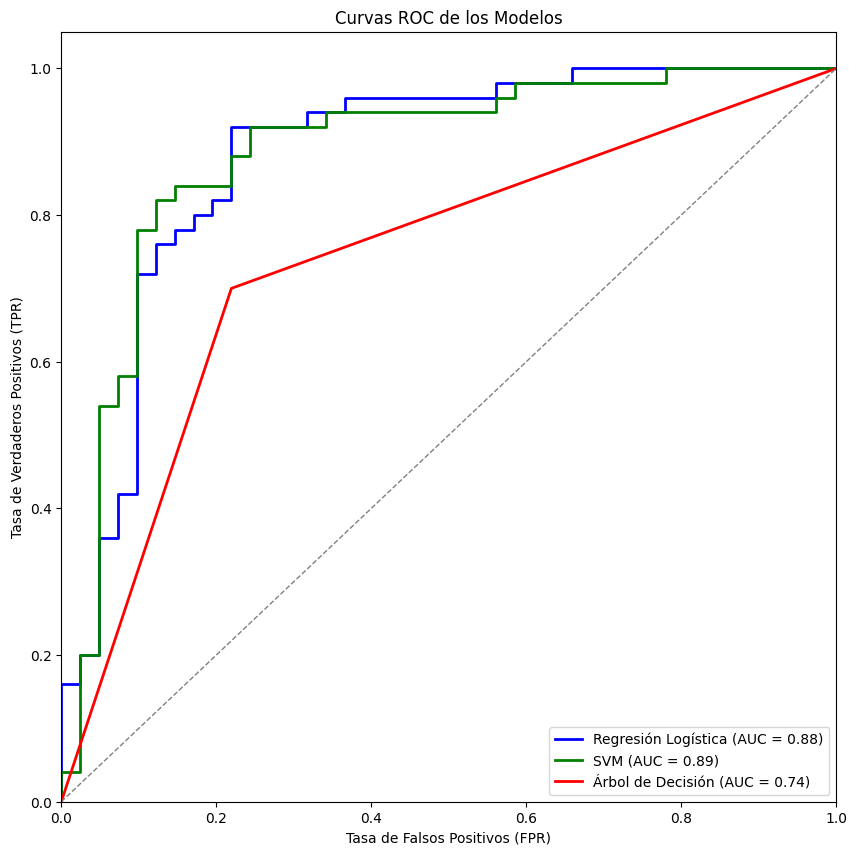

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
%matplotlib inline

# # fpr_ tasas falsos positivos y tpr_ tasas de verdaderos positivos

# Calcular las curvas ROC y AUC para cada modelo
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Graficar las curvas ROC
plt.figure(figsize=(10, 10))

# Curva ROC para Regresión Logística
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Regresión Logística (AUC = {roc_auc_logistic:.2f})')

# Curva ROC para SVM
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Curva ROC para Árbol de Decisión
plt.plot(fpr_tree, tpr_tree, color='red', lw=2, label=f'Árbol de Decisión (AUC = {roc_auc_tree:.2f})')

# Línea de referencia
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curvas ROC de los Modelos')
plt.legend(loc="lower right")
plt.show()


**10. ¿Cuál elegirías si no quieres que se escape ningún positivo?**

Para maximizar la sensibilidad o tasa de verdaderos positivos (TPR) y evitar que se escape ningún positivo (falsos negativos mínimos), se debe seleccionar el modelo que tenga la curva ROC más cercana al rincón superior izquierdo y, por lo tanto, el Área bajo la Curva ROC (AUC-ROC) más alto.

Según los resultados obtenidos:
Área bajo la Curva ROC (AUC-ROC) para el modelo de Árbol de Decisión es: 0.7402
Área bajo la Curva ROC (AUC-ROC) para el modelo SVM es: 0.8854
Área bajo la Curva ROC (AUC-ROC) para el modelo de Regresión Logística: 0.8824

El modelo SVM tiene el AUC-ROC más alto (0.8854), lo que sugiere un mejor rendimiento en la discriminación entre las clases. Por lo tanto, en términos de maximizar la sensibilidad y evitar falsos negativos, elegiría el modelo SVM.

En resumen, este modelo tiene una mayor capacidad para clasificar correctamente los casos positivos en comparación con los otros dos modelos evaluados

11.¿Qué umbral elegirías para que no se escape ningún positivo?

In [98]:
# Encontrar el índice del umbral que maximiza la sensibilidad
best_threshold_index_svm = np.argmax(tpr_svm - fpr_svm)
# Obtener el umbral correspondiente
best_threshold_svm = thresholds_svm[best_threshold_index_svm]
print(f"Umbral óptimo para maximizar sensibilidad en SVM: {best_threshold_svm}")


Umbral óptimo para maximizar sensibilidad en SVM: 0.15051157341502736


In [99]:
# Encontrar el índice del umbral que maximiza la sensibilidad
best_threshold_index_logistic = np.argmax(tpr_logistic - fpr_logistic)
# Obtener el umbral correspondiente
best_threshold_logistic = thresholds_logistic[best_threshold_index_logistic]
print(f"Umbral óptimo para maximizar sensibilidad en regresión logistica: {best_threshold_logistic}")


Umbral óptimo para maximizar sensibilidad en regresión logistica: 0.29003080168623135


In [100]:
# Encontrar el índice del umbral que maximiza la sensibilidad
best_threshold_index_tree = np.argmax(tpr_tree - fpr_tree)
# Obtener el umbral correspondiente
best_threshold_tree = thresholds_tree[best_threshold_index_tree]
print(f"Umbral óptimo para maximizar sensibilidad en arbol de decision: {best_threshold_tree}")

Umbral óptimo para maximizar sensibilidad en arbol de decision: 1.0


En este caso, el umbral del modelo de Árbol de Decisión,tiene un umbral de 1.0, lo que significa que clasificará todas las instancias como positivas. Sin embargo, hay que tener en cuenta que esta elección también puede resultar en una mayor cantidad de falsos positivos, pero no aseguraríamos que no se nos escape ningún positivo.


12. ¿Qué umbral seleccionarías para optimizar ambos valores? (Maximizar TPR y minimizar FPR)

Para optimizar ambos valores podemos usar la metrica llamada el indice de Youden o punto de operacion del clasificador. Esto busca máximizar la sensibilidad y minimizar la tasa de falsos positivos a la vez.
Se calcula restando Tasa Verdaderos Positivos menos Tasa Falsos Positivos.

In [101]:
# Calcular el Índice de Youden para Regresión Logística
youden_index_logistic = tpr_logistic[best_threshold_index_logistic] - fpr_logistic[best_threshold_index_logistic]
print(f"Índice de Youden para Regresión Logística: {youden_index_logistic}")

# Calcular el umbral para optimizar TPR y minimizar FPR en Regresión Logística
best_threshold_index_logistic = np.argmin(tpr_logistic + (1 - fpr_logistic))
best_threshold_logistic = thresholds_logistic[best_threshold_index_logistic]
print(f"Umbral para optimizar TPR y minimizar FPR en Regresión Logística: {best_threshold_logistic}")


Índice de Youden para Regresión Logística: 0.7004878048780488
Umbral para optimizar TPR y minimizar FPR en Regresión Logística: 1.9885594961002528


In [102]:
# Calcular el Índice de Youden para SVM
youden_index_svm = tpr_svm[best_threshold_index_svm] - fpr_svm[best_threshold_index_svm]
print(f"Índice de Youden para SVM: {youden_index_svm}")

best_threshold_index_svm = np.argmin(tpr_svm + (1 - fpr_svm))
best_threshold_svm = thresholds_svm[best_threshold_index_svm]
print(f"Umbral para optimizar TPR y minimizar FPR en SVM: {best_threshold_svm}")


Índice de Youden para SVM: 0.6980487804878048
Umbral para optimizar TPR y minimizar FPR en SVM: 2.694393022594955


In [104]:
# Calcular el Índice de Youden para Árbol de Decisión
youden_index_tree = tpr_tree[best_threshold_index_tree] - fpr_tree[best_threshold_index_tree]
print(f"Índice de Youden para Árbol de Decisión: {youden_index_tree}")

# Calcular el umbral para optimizar TPR y minimizar FPR en Árbol de Decisión
best_threshold_index_tree = np.argmin(tpr_tree + (1 - fpr_tree))
best_threshold_tree = thresholds_tree[best_threshold_index_tree]
print(f"Umbral para optimizar TPR y minimizar FPR en Árbol de Decisión: {best_threshold_tree}")


Índice de Youden para Árbol de Decisión: 0.48048780487804876
Umbral para optimizar TPR y minimizar FPR en Árbol de Decisión: 2.0


Seleccionariamos los siguientes valores:

Árbol de Decisión: Umbral = 2.0

SVM: Umbral = 2.6944

Regresión Logística: Umbral = 1.9886

Con estos umbrales se consigue maximizar la capacidad del modelo para detectar casos positivos mientras intenta minimizar la cantidad de falsos positivos.

Si tuviera que elegir un umbral me quedaría con el SVM ya que tiene la sensibilidad más alta (2.694) y esto maximiza la deteccion de casos positivos.